<div style="background-color:rgba(78, 188, 130, 0.05); text-align:center; vertical-align: middle; padding:20px 0;border:3px; border-style:solid; padding: 0.5em; border-color: rgba(78, 188, 130, 1.0); color: #000000;">

<img src="figs/qr_logo.png" width="700"/>

<h1><strong>Quantum Summer School</strong></h1>

<h2><strong>Episode 3</strong></h2>

<h3><strong>Entanglement & Multi-Qubit Gates</strong></h3>

</div>

*In this session, we will explore quantum entanglement by creating Bell and GHZ states using two-qubit gates. We will also explore quantum teleportation!*

<div style="background-color:rgba(255, 248, 240, 1.0); text-align:left; vertical-align: middle; padding:20px 0;border:3px; border-style:solid; padding: 0.5em; border-color: rgba(255, 142, 0, 1.0); color: #000000;">

## Objectives
1. Understand how to create entanglement with two qubits.
2. Understand how to create entanglement with many qubits.
3. Explore the quantum teleportation protocol.

<div/>

## Setup & Imports

In [4]:
from QuantumRingsLib import QuantumRingsProvider, job_monitor, QuantumCircuit, QuantumRegister, ClassicalRegister
# import qiskit versions of QuantumCircuit, QuantumRegister, ClassicalRegister so we can draw statevectors in latex
from qiskit import QuantumCircuit as qkQuantumCircuit
from qiskit import QuantumRegister as qkQuantumRegister
from qiskit import ClassicalRegister as qkClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from jupyterquiz import display_quiz

provider = QuantumRingsProvider(
    token='rings-128.RudMvYqCFOd2CE6mF7G4Xo5NANQKv54K',
    name='i20ph049@phy.svnit.ac.in'
)
backend = provider.get_backend("scarlet_quantum_rings")

## 1. Creating Entanglement

<div style="background-color:rgba(247, 255, 245, 1.0); text-align:left; vertical-align: middle; padding:20px 0;border:3px; border-style:solid; padding: 0.5em; border-color: rgba(0, 153, 51, 1.0); color: #000000;">

We learned today about entanglement and how we can create it. If we have two qubits which both start in the $|0\rangle$ state, then we can entangle them by:
1. Applying a Hadamard gate to one of the qubits to put it in an equal superposition.
2. Applying a CNOT gate controlled on the qubit in superposition, targeting the qubit in the $|0\rangle$ state.

This method creates the state $\frac{1}{\sqrt{2}} ( |00\rangle + |11\rangle )$. This is called a Bell state, and there are 4 maximally entangled two-qubit states which form a complete basis for two-qubit states. The 4 Bell states are:

$$|\Phi^+\rangle =  \frac{1}{\sqrt{2}} ( |00\rangle + |11\rangle )$$
$$|\Phi^-\rangle =  \frac{1}{\sqrt{2}} ( |00\rangle - |11\rangle )$$
$$|\Psi^+\rangle =  \frac{1}{\sqrt{2}} ( |01\rangle + |10\rangle )$$
$$|\Psi^-\rangle =  \frac{1}{\sqrt{2}} ( |01\rangle - |10\rangle )$$

These states differ in the parity of the qubits (even = qubits are either both 0 or both 1, odd = one qubit is 0 and one qubit is 1) and the phase (plus or minus amplitude for the second ket). Every two-qubit state can be written as a linear combination of Bell states.

</div>

Let's first make the state $|\Phi^+\rangle$.

In [2]:
q = qkQuantumRegister(2, 'q')
c = qkClassicalRegister(2, 'c')
qc = qkQuantumCircuit(q, c)

qc.h(q[1])
qc.cx(q[1], q[0])

qc.draw()

┌───┐
q_0: ─────┤ X ├
     ┌───┐└─┬─┘
q_1: ┤ H ├──■──
     └───┘     
c: 2/══════════

In [3]:
sv = Statevector(qc)
sv.draw('latex')

<IPython.core.display.Latex object>

How should we modify our circuit to make $|\Phi^-\rangle$?

In [10]:
qc = qkQuantumCircuit(q, c)

## MODIFY
qc.x(q[1])
qc.h(q[1])
qc.cx(q[1], q[0])

qc.draw()

┌───┐
q_0: ──────────┤ X ├
     ┌───┐┌───┐└─┬─┘
q_1: ┤ X ├┤ H ├──■──
     └───┘└───┘     
c: 2/═══════════════

In [11]:
sv = Statevector(qc)
sv.draw('latex')

<IPython.core.display.Latex object>

How should we modify our circuit to make $|\Psi^+\rangle$?

In [12]:
qc = qkQuantumCircuit(q, c)

## MODIFY
qc.x(q[0])
qc.h(q[1])
qc.cx(q[1], q[0])

qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ X ├
     ├───┤└─┬─┘
q_1: ┤ H ├──■──
     └───┘     
c: 2/══════════

In [13]:
sv = Statevector(qc)
sv.draw('latex')

<IPython.core.display.Latex object>

What about $|\Psi^-\rangle$?

In [18]:
qc = qkQuantumCircuit(q, c)

## MODIFY
qc.x(q[0])
qc.h(q[1])
qc.z(q[1])
qc.cx(q[1], q[0])

qc.draw()

┌───┐     ┌───┐
q_0: ┤ X ├─────┤ X ├
     ├───┤┌───┐└─┬─┘
q_1: ┤ H ├┤ Z ├──■──
     └───┘└───┘     
c: 2/═══════════════

In [19]:
sv = Statevector(qc)
sv.draw('latex')

<IPython.core.display.Latex object>

### Check your understanding: Entanglement and Bell States 

<div class="sec1_ques1" style="display:none">
[
  {
    "question": "True or False: The Bell states are all orthogonal to each other.",
    "type": "multiple_choice",
    "answers": [
      {"answer":"True","correct":true,  "feedback":"✅ The Bell states form a complete basis for two-qubit states. Since this is a 4 dimensional Hilbert space (the state vectors have 4 components), any basis must be 4 orthogonal states."},
      {"answer":"False","correct":false, "feedback":"❌"}
    ]
  }
]
</div>

<div class="sec1_ques2" style="display:none">
[
  {
    "question": "What role does the Hadamard gate play in creating entanglement?",
    "type": "multiple_choice",
    "answers": [
      {"answer":"Flips the state of a qubit.","correct":false,  "feedback":"❌"},
      {"answer":"Flips the state of a qubit conditional on the state of the other.","correct":false, "feedback":"❌"},
      {"answer":"Puts the system into a superposition state.","correct":true, "feedback":"✅ We need superposition to have entanglement."},
    {"answer":"Flips the phase of a qubit.","correct":false, "feedback":"❌"}
    ]
  }
]
</div>

<div class="sec1_ques3" style="display:none">
[
  {
    "question": "What role does the CNOT gate play in creating entanglement?",
    "type": "multiple_choice",
    "answers": [
      {"answer":"Flips the state of a qubit.","correct":false,  "feedback":"❌"},
      {"answer":"Flips the state of a qubit conditional on the state of the other.","correct":true, "feedback":"✅ We need the qubits to interact with each other to create entanglement."},
      {"answer":"Puts the system into a superposition state.","correct":false, "feedback":"❌"},
    {"answer":"Flips the phase of a qubit.","correct":false, "feedback":"❌"}
    ]
  }
]
</div>

<div class="sec1_ques4" style="display:none">
[
  {
    "question": "If I want to create the Bell state with odd parity and no phase shift, which gates do I need in addition to H and CNOT?",
    "type": "multiple_choice",
    "answers": [
      {"answer":"X","correct":true,  "feedback":"✅"},
      {"answer":"Z","correct":false, "feedback":"❌"},
      {"answer":"X and Z","correct":false, "feedback":"❌"}
    ]
  }
]
</div>

<div class="sec1_ques5" style="display:none">
[
  {
    "question": "If I want to create the Bell state with odd parity and a phase shift, which gates do I need in addition to H and CNOT?",
    "type": "multiple_choice",
    "answers": [
      {"answer":"X and Z","correct":true,  "feedback":"✅"},
      {"answer":"Z","correct":false, "feedback":"❌"},
      {"answer":"X","correct":false, "feedback":"❌"}
    ]
  }
]
</div>

In [20]:
display_quiz("#sec1_ques1")
display_quiz("#sec1_ques2")
display_quiz("#sec1_ques3")
display_quiz("#sec1_ques4")
display_quiz("#sec1_ques5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2. Bell State Measurement

<div style="background-color:rgba(236, 250, 255, 1.0); text-align:left; vertical-align: middle; padding:20px 0;border:3px; border-style:solid; padding: 0.5em; border-color: rgba(35, 175, 219, 1.0); color: #000000;">

What if I gave you a Bell state and told you "measure these qubits **once** and tell me which Bell state it was!" Could you do it?

If we just measure both qubits, we can only learn the parity of the state, so you can tell me if it's $|\Phi^\pm\rangle$ or $|\Psi^\pm\rangle$, but you can't tell the difference between $|\Phi^+\rangle$ and $|\Phi^-\rangle$ or $|\Psi^+\rangle$ and $|\Psi^-\rangle$.

Last week, we saw that you can tell the difference between $|+\rangle$ and $|-\rangle$ in one shot if you apply a Hadamard gate right before measuring. This Hadamard maps $|+\rangle$ to $|0\rangle$ and $|-\rangle$ to $|1\rangle$. Essentially, it rotates us into the X basis (whereas we normally work in the Z basis). Take this as a hint and try to think of how we could make a measurement scheme which rotates us into the "Bell basis."

<div/>

In [6]:
# helper function for Bell state preparation

def prepare_bell_state(qc, name, qb1=1, qb2=0):

    qc.h(qb1)
    qc.cx(qb1, qb2)

    if name in ['Phi_minus', 'Psi_minus']:
        qc.z(qb2)
    if name in ['Psi_plus', 'Psi_minus']:
        qc.x(qb2)

Job Running
Using Engine: scarlet_quantum_rings
Job Done.
Ending Job Monitor


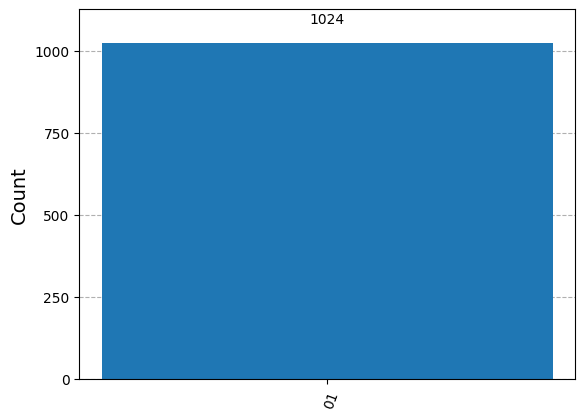

In [27]:
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')
qc = QuantumCircuit(q, c, name="QSS3.0_bell_state_meas")

prepare_bell_state(qc, 'Psi_plus')

# insert here
qc.cx(1,0)
qc.h(1)

qc.measure(q, c)

job = backend.run(qc, shots=1024)
job_monitor(job)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

**Question:** What result do you get for the other three Bell states?

Job Queued
Using Engine: scarlet_quantum_rings
Job Done.
Ending Job Monitor
Job Queued
Job Done.
Ending Job Monitor
Job Queued
Using Engine: scarlet_quantum_rings
Using Engine: scarlet_quantum_rings
Job Done.
Ending Job Monitor


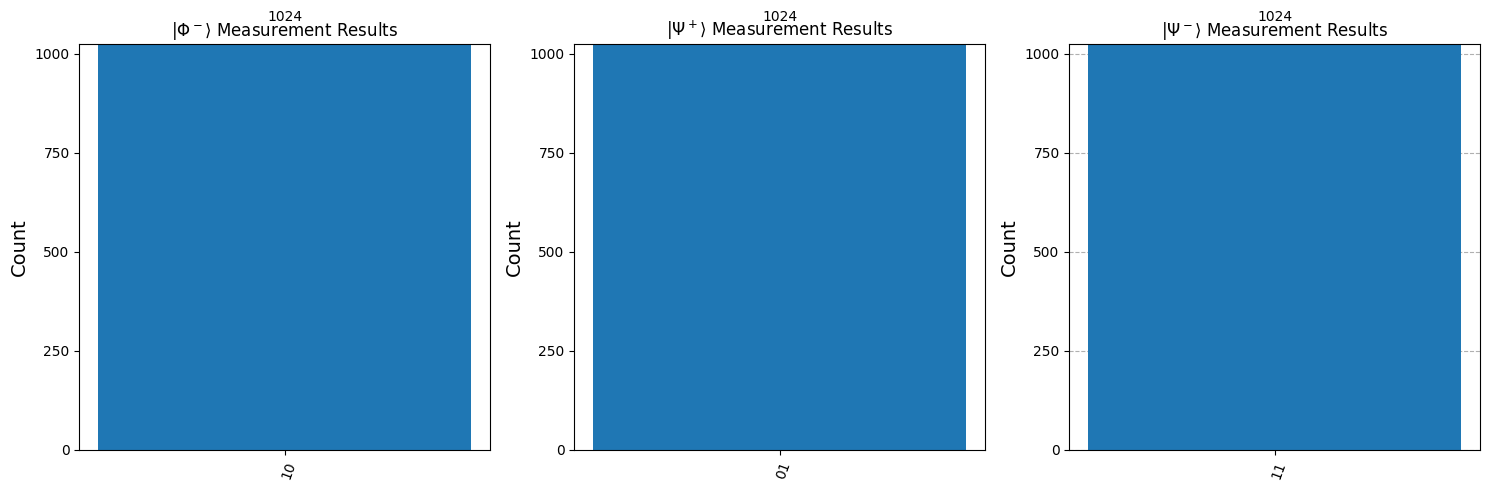

In [31]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

# Dictionary to store all results
results = {}

# Test all three requested Bell states
for bell_state in ['Phi_minus', 'Psi_plus', 'Psi_minus']:
    qc = QuantumCircuit(q, c, name=f"Bell_Measurement_{bell_state}")
    
    # Prepare the Bell state
    prepare_bell_state(qc, bell_state)
    
    # Measurement in Bell basis (reverse of preparation)
    qc.cx(1, 0)
    qc.h(1)
    qc.measure(q, c)
    
    # Execute and store results
    job = backend.run(qc, shots=1024)
    job_monitor(job)
    result = job.result()
    counts = result.get_counts()
    results[bell_state] = counts

# Plot results with proper titles
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = {
    'Phi_minus': r'$|\Phi^-\rangle$ Measurement Results',
    'Psi_plus': r'$|\Psi^+\rangle$ Measurement Results', 
    'Psi_minus': r'$|\Psi^-\rangle$ Measurement Results'
}

for i, (state, counts) in enumerate(results.items()):
    plot_histogram(counts, ax=axes[i])
    axes[i].set_title(titles[state], fontsize=12)
    axes[i].set_ylim(0, 1024)  # Set y-axis limit to match shot count

plt.tight_layout()
plt.show()

**Question:** Can you say anything about the relationship between the measurement result and the parity & phase of the Bell state?

## 3. GHZ (Greenberger–Horne–Zeilinger) State

<div style="background-color:rgba(255, 245, 253, 1.0); text-align:left; vertical-align: middle; padding:20px 0;border:3px; border-style:solid; padding: 0.5em; border-color: rgba(255, 142, 235, 1.0); color: #000000;">

A GHZ state is an n-qubit maximally entangled state which takes the form:

$$|\text{GHZ}\rangle = \frac{1}{\sqrt{2}}(|00\cdots 0\rangle + |11\cdots 1\rangle)$$

**Quick Notation Note:** In the expression above, you can't tell how many 0s or 1s there are (i.e. how many qubits). We can use the following notation instead:

$$|\text{GHZ}\rangle = \frac{1}{\sqrt{2}}(|0\rangle^{\otimes n} + |1\rangle^{\otimes n})$$

The term $|0\rangle^{\otimes n} = |0\rangle \otimes  |0\rangle \cdots \otimes  |0\rangle $ tells us that we have an n-qubit space with all qubits in the  $|0\rangle$ state. So we are in a superposition of all qubits being 0 or all qubits being 1.

<div/>

Let's make the 3 qubit GHZ state. How would you do this? Hint: to make the 2-qubit GHZ state, which is $\Phi^+\rangle$, we needed a Hadamard to create superposition and a CNOT to entangle the qubits, so these same elements should appear here!

In [35]:
n = 3
q = qkQuantumRegister(n, 'q')
qc = qkQuantumCircuit(q, name="QSS3.1_ghz")

## Make GHZ state here!

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

display(qc.draw())

sv = Statevector(qc)
sv.draw('latex')

┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐     
q_1: ─────┤ X ├──■──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

<IPython.core.display.Latex object>

Now try making a 4 qubit GHZ state.

In [38]:
### 4 qubit GHZ state
n = 4
q = qkQuantumRegister(n, 'q')
qc = qkQuantumCircuit(q, name="QSS3.2_ghz")

## Make GHZ state here!

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)

display(qc.draw())

sv = Statevector(qc)
sv.draw('latex')

┌───┐               
q_0: ┤ H ├──■────────────
     └───┘┌─┴─┐          
q_1: ─────┤ X ├──■───────
          └───┘┌─┴─┐     
q_2: ──────────┤ X ├──■──
               └───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘

<IPython.core.display.Latex object>

<div style="background-color:rgba(252, 245, 255, 1.0); text-align:left; vertical-align: middle; padding:20px 0;border:3px; border-style:solid; padding: 0.5em; border-color: rgba(190, 111, 227, 1.0); color: #000000;">

### Challenge Problem: 

Try to make the following states with your own quantum circuits! You can check your work by printing out the final state vector of the circuit (see the example below).
1. $ \frac{1}{\sqrt{2}}( |0000\rangle - |1111\rangle )$
2. $ \frac{1}{\sqrt{2}}( |0101\rangle - |1010\rangle )$
3. $ \frac{1}{2}( |00\rangle + |01\rangle + |10\rangle + |11\rangle )$
4. $ \frac{1}{2}( |0000\rangle + |0101\rangle + |1010\rangle + |1111\rangle )$

Also, which of the four examples above are entangled states? 

<div/>

In [40]:
# State 1: (|0000> - |1111>)/√2
n = 4
q = qkQuantumRegister(n, 'q')
qc = qkQuantumCircuit(q, name="QSS3.2_state1")

# Create GHZ state and add phase
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.z(0)  # Adds negative phase to |1111>

display(qc.draw())

sv = Statevector(qc)
sv.draw('latex')

┌───┐     ┌───┐     
q_0: ┤ H ├──■──┤ Z ├─────
     └───┘┌─┴─┐└───┘     
q_1: ─────┤ X ├──■───────
          └───┘┌─┴─┐     
q_2: ──────────┤ X ├──■──
               └───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘

<IPython.core.display.Latex object>

In [16]:
# State 2: (|0101> - |1010>)/√2
n = 4
q = qkQuantumRegister(n, 'q')
qc = qkQuantumCircuit(q, name="QSS3.2_state2")

# Prepare specific pattern with phase
qc.x(0)       # Initialize to |1>
qc.z(0)       # Apply Z gate to flip the phase
qc.h(0)       # Create superposition with phase
qc.x(1)       # Set to |1>
qc.x(3)       # Set to |1> (now |1101>)
qc.cx(0, 1)   # Flip qubit1 when control is |1>
qc.cx(0, 2)   # Flip qubit2 when control is |1>
qc.cx(0, 3)   # Flip qubit3 when control is |1>

display(qc.draw())

sv = Statevector(qc)
sv.draw('latex')

┌───┐┌───┐┌───┐               
q_0: ┤ X ├┤ Z ├┤ H ├──■────■────■──
     ├───┤└───┘└───┘┌─┴─┐  │    │  
q_1: ┤ X ├──────────┤ X ├──┼────┼──
     └───┘          └───┘┌─┴─┐  │  
q_2: ────────────────────┤ X ├──┼──
     ┌───┐               └───┘┌─┴─┐
q_3: ┤ X ├────────────────────┤ X ├
     └───┘                    └───┘

<IPython.core.display.Latex object>

In [47]:
# State 3: (|00> + |01> + |10> + |11>)/2
n = 2  # Note: Only 2 qubits needed
q = qkQuantumRegister(n, 'q')
qc = qkQuantumCircuit(q, name="QSS3.2_state3")

# Equal superposition
qc.h(0)
qc.h(1)

display(qc.draw())

sv = Statevector(qc)
sv.draw('latex')

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

<IPython.core.display.Latex object>

In [48]:
# State 4: (|0000> + |0101> + |1010> + |1111>)/2
n = 4
q = qkQuantumRegister(n, 'q')
qc = qkQuantumCircuit(q, name="QSS3.2_state4")

# Create superposition and copy bits
qc.h(0)
qc.h(1)
qc.cx(0, 2)  # Copy qubit0 to qubit2
qc.cx(1, 3)  # Copy qubit1 to qubit3

display(qc.draw())

sv = Statevector(qc)
sv.draw('latex')

┌───┐          
q_0: ┤ H ├──■───────
     ├───┤  │       
q_1: ┤ H ├──┼────■──
     └───┘┌─┴─┐  │  
q_2: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_3: ──────────┤ X ├
               └───┘

<IPython.core.display.Latex object>

## 4. Quantum State Teleportation

Quantum state teleportation is an elementary protocol in quantum computing that allows one party to send another a quantum state **without actually sending a qubit**. All it requires is that the parties share a Bell pair (maximally entangled state) and that the sender can locally perform two-qubit gates and send the recipient classical information (i.e. give them a call or send a text).

<div style="background-color:rgba(243, 248, 255, 1.0); text-align:left; vertical-align: middle; padding:20px 0;border:3px; border-style:solid; padding: 0.5em; border-color: rgba(101, 174, 247, 1.0); color: #000000;">

<h4><strong>The Idea Behind Quantum Teleportation</strong></h4>

Note that the name quantum teleportation is a bit misleading, since nothing physical is being transported. A more precise name would be quantum *information* teleportation. The protocol is as follows:

1. Alice and Bob each receive one qubit of a Bell pair. 
2. Alice wants to transfer a qubit $\ket{\phi}_A=\alpha\ket{0}+\beta\ket{1}$ to Bob. In other words, Bob should end up with qubit
    $$
        \ket{\phi}_B=\alpha\ket{0}+\beta\ket{1} \nonumber
    $$
3. Because Alice has two qubits, she can perform a *Bell measurement* on them.
4. Alice sends Bob the result of her measurement over a classical channel.
5. Bob manipulates his state based on Alice's result, applying an X gate and/or a Z gate.
6. Tada! Bob has the state $\ket{\phi}_A=\alpha\ket{0}+\beta\ket{1}$.

The circuit for the procotol can be expressed as:

<img src="figs/quantum_tele_circuit.png" width="800"/>

**Note:** the double lines coming from Alice's measurement results to Bob's gates indicate controlled measurements. If $m_0 = 1$, Bob should apply an X gate, and if $m_1 = 1$, he should apply a Z gate. 

We summarize the four possible Bell state measurement results for Alice and Bob's required manipulations in the following table:

| Alice's Result &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Bob's state &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Bob's state (in terms of $\ket{\phi}$) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Bob applies &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |
| :-------------------------------- | :-------------------------------- | :-------------------------------- |:-------------------------------- |
 |$\ket{\Phi^+} ~~~ (00)$ | $\alpha \ket{0} + \beta \ket{1} $ | $\ket{\psi}$ | $\mathbb{1}$ |
 |$\ket{\Psi^+} ~~ (01)$ | $\alpha \ket{1} + \beta \ket{0} $ | $X\ket{\psi}$ | $X$ | 
 |$\ket{\Phi^-} ~~ (10)$ | $\alpha \ket{0} - \beta \ket{1} $ | $Z\ket{\psi}$ | $Z$ |
 |$\ket{\Psi^-} ~~ (11)$ | $\alpha \ket{1} - \beta \ket{0} $ | $XZ\ket{\psi}$ | $ZX$ |

Of course, Alice could simply physically send a $\ket{\phi}$ encoded qubit to Bob. The key is that with quantum teleportation, Alice never even has to do that! Instead, Alice only needs to transmit classical information to Bob (which unfortunately, does limit the communication to the speed of light, *as required by the laws of nature*).

</div>

In [10]:
a = QuantumRegister(2, 'A')
c = ClassicalRegister(2, 'C')
b = QuantumRegister(1, 'B')
qc = QuantumCircuit(a,b,c, name="QSS3.2_teleport")

# Prepare Alice's state to teleport

qc.barrier()



# Prepare Alice and Bob's Bell State

qc.h(a[1]) 
qc.cx(a[1], b[0]) 

qc.barrier()

# Alice performs Bell state measurement

qc.cx(a[0],a[1])
qc.h(a[0])
qc.measure(a, c)

qc.barrier()

# Bob manipulates state based on Alice's measurement

qc.cx(a[1], b[0])
qc.cz(a[0], b[0])

display(qc.draw('mpl'))
job = backend.run(qc, shots=1)
job_monitor(job)
result = job.result()

counts = result.get_counts()

# print the measurement result (only one shot, so get the key from the counts dictionary)
print("Alice's result:", next(iter(counts.keys())))

        ╎            ╎      ┌───┐┌───┐      ╎            
A[0]: ■─╎────────────╎───■──┤ H ├┤ M ├──────╎────────■── 
        ╎ ┌───┐      ╎ ┌─┴─┐└───┘└─╥─┘┌───┐ ╎        │   
A[1]: ■─╎─┤ H ├──■───╎─┤ X ├───────║──┤ M ├─╎───■────│── 
        ╎ └───┘┌─┴─┐ ╎ └───┘       ║  └─╥─┘ ╎ ┌─┴─┐┌─┴─┐ 
B[0]: ■─╎──────┤ X ├─╎─────────────║────║───╎─┤ X ├┤ Z ├ 
        ╎      └───┘ ╎             ║    ║   ╎ └───┘└───┘ 
C: 2/ ■════════════════════════════╩════╩═══════════════ 
                                   0    1                


None

Job Running
Using Engine: Job Done.
Ending Job Monitor
Alice's result: 10
scarlet_quantum_rings


        ┌───┐ ╎            ╎      ┌───┐┌───┐      ╎                 
A[0]:  ■┤ X ├─╎────────────╎───■──┤ H ├┤ M ├──────╎────────■─────── 
        └───┘ ╎ ┌───┐      ╎ ┌─┴─┐└───┘└─╥─┘┌───┐ ╎        │        
A[1]:  ■──────╎─┤ H ├──■───╎─┤ X ├───────║──┤ M ├─╎───■────│─────── 
              ╎ └───┘┌─┴─┐ ╎ └───┘       ║  └─╥─┘ ╎ ┌─┴─┐┌─┴─┐┌───┐ 
B[0]:  ■──────╎──────┤ X ├─╎─────────────║────║───╎─┤ X ├┤ Z ├┤ M ├ 
              ╎      └───┘ ╎             ║    ║   ╎ └───┘└───┘└─╥─┘ 
CA: 3/ ■═════════════════════════════════╩════╩═════════════════╩══ 
                                         0    1                 2   


None

Job Running
Job Done.
Ending Job Monitor
Using Engine: scarlet_quantum_rings


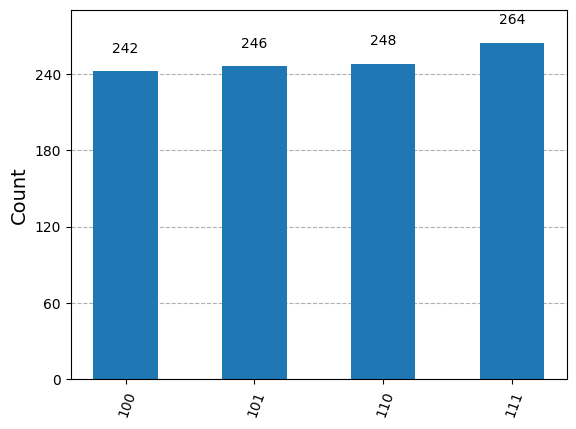

In [15]:
## Full protocol with Bob measuring

a = QuantumRegister(2, 'A')
c_a = ClassicalRegister(2, 'CA')
b = QuantumRegister(1, 'B')
c_b = ClassicalRegister(1, 'CB')
qc = QuantumCircuit(a,b,c_a,c_b)

## Prepare Alice's state
qc.x(a[0])  # Alice's qubit to teleport


qc.barrier()

prepare_bell_state(qc, 'Phi_plus', qb1=a[1], qb2=b[0])

qc.barrier()

qc.cx(a[0],a[1])
qc.h(a[0])
qc.measure(a,c_a)

qc.barrier()

qc.cx(a[1],b[0])
qc.cz(a[0],b[0])

qc.measure(b,c_b)

display(qc.draw('mpl'))
job = backend.run(qc, shots=1000)
job_monitor(job)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## NOTE: the ordering of bits is first measured on the right and last measured on the left!

<div style="background-color:rgba(252, 245, 255, 1.0); text-align:left; vertical-align: middle; padding:20px 0;border:3px; border-style:solid; padding: 0.5em; border-color: rgba(190, 111, 227, 1.0); color: #000000;">

### Challenge Problem: 

Play around with Alice's initial state, using all the gates we learned from last week! Make sure Bob "undos" Alice's operations at the end and check if the state teleportation really worked.

Example: If Alice prepares the state $|+i\rangle$, you could apply an S gate and Hadamard, and then Bob should always measure 1.

<div/>

## Conclusion & Preview
Today we introduced the CNOT gate and entanglement. Next episode will build on conditional quantum logic, exploring classical–quantum interactions in circuit design.